**Import libraries**

In [ ]:
from google.colab import drive
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**Import data**

In [ ]:
drive.mount('/content/drive')

data_dir = "/content/drive/My Drive/FYP/centaline/"

Mounted at /content/drive


In [ ]:
hk = ["Kennedy_town_sai_ying_pun", "South_horizon", "Bel_air_sasson", "Aberdeen_ap_lei_chau", "Mid_level_west", "Peak_south",
             "Wanchai_causeway_bay", "Mid_level_central", "Happy_valley_mid_level_east", "Mid_level_north_point", "North_point_fortress_hill", 
             "Quarry_bay_kornhill", "Taikoo_shing", "Shau_kei_wan_chai_wan", "Heng_fa_chuen", "Sheung_wan_central_admiralty"]

kowloon = ["Olympic_station", "Kowloon_station", "Mongkok_yaumatei", "Tsimshatsui_jordan", "Ho_man_tin_kings_park", "To_kwa_wan", 
                  "Whampoa_laguna_verde", "Tseung_kwan_o", "Meifoo_wonderland", "Cheung_sha_wan_west", "Cheung_sha_wan_sham_shui_po", 
                  "Yau_yat_tsuen_shek_kip_mei", "Kowloon_tong_beacon_hill", "Lam_tin_yau_tong", "Kowloon_bay_ngau_chi_wan", "Kwun_tong", 
                  "Diamond_hill_wong_tai_sin", "To_kwa_wan_east", "Hung_hum", "Kai_tak"]

new_east = ["Sai_kung", "Tai_wai", "Shatin", "Fotan_shatin_mid_level_kau_to_shan", "Ma_on_shan", "Tai_po_mid_level_hong_lok_yuen", 
                   "Tai_po_market_tai_wo", "Sheung_shui_fanling_kwu_tung"]

new_west = ["Discovery_bay", "Fairview_park_palm_spring_the_vineyard", "Yuen_long", "Tuen_mun", "Tin_shui_wai", "Tsuen_wan", "Kwai_chung", 
                   "Tsing_yi", "Ma_wan_park_island","Tung_chung_islands", "Sham_tseng_castle_peak_road", "Belvedere_garden_castle_peak_road"]

In [ ]:
# Data directory
dir_hk = "./hk_island/"
dir_kowloon = "./kowloon/"
dir_new_east = "./new_east/"
dir_new_west = "./new_west/"

def get_data_by_district(district_name, disctrict_dir):

  district_df = pd.DataFrame()
  for region in district_name:
    new_df = pd.read_csv(data_dir+disctrict_dir+region+".csv")
    new_df["District"] = region
    district_df = pd.concat([district_df, new_df], axis=0)

  # Data cleaning
  district_df['SaleableArea'] = district_df['SaleableArea'].replace("-", np.nan)
  district_df['SaleableArea'] = pd.to_numeric(district_df['SaleableArea']) 
  district_df['UnitPricePerSaleableArea'] = district_df['UnitPricePerSaleableArea'].replace("-", np.nan)
  district_df['UnitPricePerSaleableArea'] = pd.to_numeric(district_df['UnitPricePerSaleableArea']) 
  district_df['GrossArea'] = district_df['GrossArea'].replace("-", np.nan)
  district_df['GrossArea'] = pd.to_numeric(district_df['GrossArea']) 
  district_df['LastHold'] = district_df['LastHold'].replace("-", np.nan)
  district_df['LastHold'] = pd.to_numeric(district_df['LastHold']) 
  district_df['GainLoss'] = district_df['GainLoss'].replace("-", np.nan)
  district_df['GainLoss'] = pd.to_numeric(district_df['GainLoss']) 

  district_df = district_df.drop(district_df.columns[0], axis=1)
  district_df['RegDate'] = pd.to_datetime(district_df['RegDate'])
  district_df.sort_values(by=['RegDate'], inplace=True, ascending=False)

  district_df = district_df.reset_index()
  district_df = district_df.drop(['index'], axis=1)
  return district_df

def download_data(filename, download_data):
  dataFrame = pd.DataFrame(data=download_data)
  dataFrame.to_csv(filename)
  files.download(filename)

# Get data by distirct
data_df_hk = get_data_by_district(hk, dir_hk)
data_df_kowloon = get_data_by_district(kowloon, dir_kowloon)
data_df_new_east = get_data_by_district(new_east, dir_new_east)
data_df_new_west = get_data_by_district(new_west, dir_new_west)

# Get all district data
data_df_all = pd.concat([data_df_hk, data_df_kowloon, data_df_new_east, data_df_new_west], axis=0)
data_df_all.sort_values(by=['RegDate'], inplace=True, ascending=False)
data_df_all = data_df_all.reset_index()
data_df_all = data_df_all.drop(['index'], axis=1)
data_df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251660 entries, 0 to 251659
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Address                   251660 non-null  object        
 1   BuildingAge               251660 non-null  int64         
 2   RegDate                   251660 non-null  datetime64[ns]
 3   Price                     251660 non-null  float64       
 4   SaleableArea              227968 non-null  float64       
 5   GrossArea                 132535 non-null  float64       
 6   UnitPricePerSaleableArea  227967 non-null  float64       
 7   UnitPricePerGrossArea     251660 non-null  object        
 8   LastHold                  120840 non-null  float64       
 9   GainLoss                  120840 non-null  float64       
 10  District                  251660 non-null  object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(3)
memory usag

**Unit price for saleable area distribution**

count    227967.000000
mean      15324.452842
std        6105.796666
min        1476.000000
25%       11594.000000
50%       14618.000000
75%       17802.000000
max      484585.000000
Name: UnitPricePerSaleableArea, dtype: float64


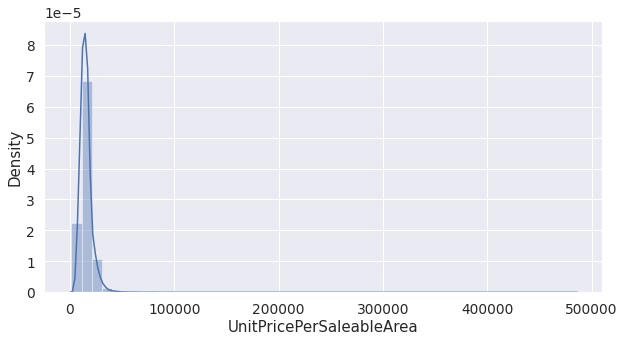

In [ ]:
# Distribution
print(data_df_all['UnitPricePerSaleableArea'].describe())

# Histogram
plt.figure(figsize=(10,5))
sns.distplot(data_df_all['UnitPricePerSaleableArea']);

**Feature Engineering**

In [ ]:
def removeOutlier(outliers_removed_df, col):
  # Calculate mean and standard deviation
  data_mean, data_std = np.mean(outliers_removed_df[col]), np.std(outliers_removed_df[col])
  # Calculate upper boundary
  upper = data_mean + data_std * 5

  # Remove outliers
  outliers_removed_df = outliers_removed_df[outliers_removed_df[col] < upper]

  print("Length of data after removing outliers:", len(outliers_removed_df))

  fig, ax = plt.subplots(figsize=(10, 3))
  sns.boxplot(x=col, data=outliers_removed_df)

  return outliers_removed_df

Length of data after removing outliers: 250998


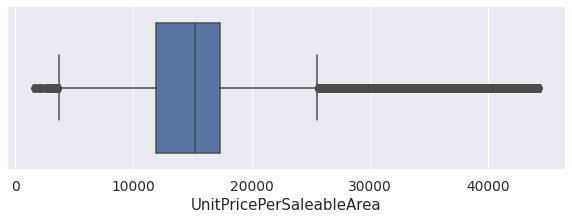

In [117]:
# Data preprocessing
processed_df = data_df_all.copy()

# Add new features
processed_df['month'] = pd.to_datetime(processed_df['RegDate']).dt.month
processed_df['year'] = pd.to_datetime(processed_df['RegDate']).dt.year

# Drop unnecessary columns
processed_df = processed_df.drop(['Address', 'LastHold', 'GainLoss', 'District', 'RegDate', 'Price'], axis=1)

# Handling missinig values
# Fill with mean
unitSaleableArea_mean = processed_df['UnitPricePerSaleableArea'].mean()
processed_df['UnitPricePerSaleableArea'] = processed_df['UnitPricePerSaleableArea'].fillna(unitSaleableArea_mean)

# Remove outliers
processed_df = removeOutlier(processed_df, 'UnitPricePerSaleableArea')

**Unit price for saleable area distribution (after removing outliers)**

count    250998.000000
mean      15203.487881
std        5132.072388
min        1476.000000
25%       11919.000000
50%       15218.000000
75%       17367.000000
max       44372.000000
Name: UnitPricePerSaleableArea, dtype: float64


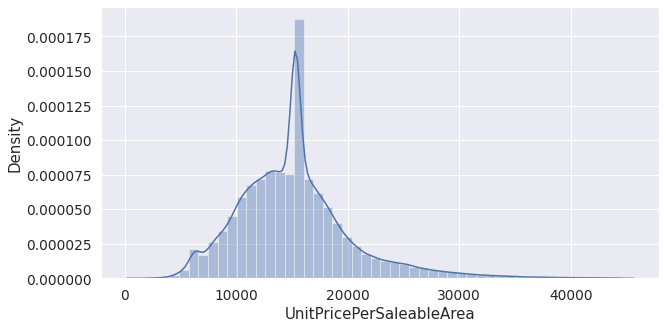

In [ ]:
# Distribution
print(processed_df['UnitPricePerSaleableArea'].describe())

# Histogram
plt.figure(figsize=(10,5))
sns.distplot(processed_df['UnitPricePerSaleableArea']);

**Calculate monthly average unit price for saleable area**

In [116]:
monthly_df = processed_df.copy()
monthly_df = monthly_df.groupby(['year','month'],as_index=False).mean()
monthly_df.head()

,year,month,BuildingAge,SaleableArea,GrossArea,UnitPricePerSaleableArea
0,2017,1,24.340922,568.063636,744.210993,13365.894808
1,2017,2,20.629673,573.908907,732.828608,13429.642917
2,2017,3,23.879587,563.366976,720.772680,13356.361712
3,2017,4,21.575266,556.800439,719.879864,14692.598498
4,2017,5,23.043626,577.006638,734.677921,13900.576762


count       48.000000
mean     15173.691654
std        768.428320
min      13356.361712
25%      14783.366143
50%      15373.212651
75%      15618.769340
max      16919.227030
Name: UnitPricePerSaleableArea, dtype: float64


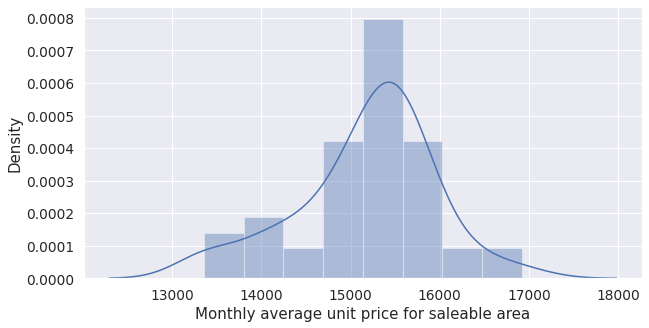

In [ ]:
# Distribution
print(monthly_df['UnitPricePerSaleableArea'].describe())

# Histogram
plt.figure(figsize=(10,5))
sns.distplot(monthly_df['UnitPricePerSaleableArea'], axlabel="Monthly average unit price for saleable area");


**Import economic data**

In [ ]:
new_monthly_df = monthly_df.copy()

conditions_year = [
  (new_monthly_df['year'] == 2017), (new_monthly_df['year'] == 2018),
  (new_monthly_df['year'] == 2019) 
]

conditions_half = [
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] < 7), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] < 13),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] < 7), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] < 13),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] < 7), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] < 13),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] < 7)
]

conditions_quarter = [
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] < 4), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] < 7),
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] < 10), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] < 13),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] < 4), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] < 7),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] < 10), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] < 13),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] < 4), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] < 7),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] < 10), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] < 13),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] < 4), (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] < 7),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] < 10)
]

conditions_month = [
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 1), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 2),
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 3), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 4),
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 5), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 6),
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 7), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 8),
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 9), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 10),
  (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 11), (new_monthly_df['year'] == 2017) & (new_monthly_df['month'] == 12),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 1), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 2),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 3), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 4),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 5), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 6),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 7), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 8),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 9), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 10),
  (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 11), (new_monthly_df['year'] == 2018) & (new_monthly_df['month'] == 12),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 1), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 2),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 3), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 4),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 5), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 6),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 7), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 8),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 9), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 10),
  (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 11), (new_monthly_df['year'] == 2019) & (new_monthly_df['month'] == 12),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 1), (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 2),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 3), (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 4),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 5), (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 6),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 7), (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 8),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 9), (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 10),
  (new_monthly_df['year'] == 2020) & (new_monthly_df['month'] == 11)
]

In [131]:
# Data directory
file_dir = "../determinants/"

district_df = pd.DataFrame()

population_df = pd.read_csv(data_dir+file_dir+"TABLE001.csv")
unemployment_rate_df = pd.read_csv(data_dir+file_dir+"TABLE006.csv")
export_import_df = pd.read_csv(data_dir+file_dir+"TABLE055.csv")
gdp_df = pd.read_csv(data_dir+file_dir+"TABLE030.csv")
consumer_price_indices_df = pd.read_csv(data_dir+file_dir+"TABLE052.csv")

value_population = population_df['Number_000'].tolist()
value_unemployment_adjusted = unemployment_rate_df['Unemployment_rate_seasonally_adjusted'].tolist()
value_unemployment_not_adjusted = unemployment_rate_df['Unemployment_rate_not_adjusted'].tolist()
value_import = export_import_df['Imports'].tolist()
value_export = export_import_df['Total_exports'].tolist()
value_gdp = gdp_df['GDP_current_market_prices'].tolist()
value_gdp_per_capita = gdp_df['Per_capita_GDP_current_market_prices'].tolist()
value_gdp = gdp_df['GDP_current_market_prices'].tolist()
value_gdp_per_capita = gdp_df['Per_capita_GDP_current_market_prices'].tolist()
value_consumer_price_indices = consumer_price_indices_df['Composite_Consumer_Price_Index'].tolist()

new_monthly_df['Population'] = np.select(conditions_half, value_population) 
new_monthly_df['Unemployment_adjusted'] = np.select(conditions_month[:46], value_unemployment_adjusted) 
new_monthly_df['Unemployment_not_adjusted'] = np.select(conditions_month[:46], value_unemployment_not_adjusted)
new_monthly_df['Imports'] = np.select(conditions_month, value_import) 
new_monthly_df['Total_exports'] = np.select(conditions_month, value_export)
new_monthly_df['GDP'] = np.select(conditions_quarter, value_gdp[3:])
new_monthly_df['GDP_per_capita'] = np.select(conditions_year, value_gdp_per_capita[:3])
new_monthly_df['CCP_index'] = np.select(conditions_month, value_consumer_price_indices)

new_monthly_df['GDP'] = new_monthly_df['GDP'].str.replace(',', '').astype(float)
new_monthly_df['GDP_per_capita'] = new_monthly_df['GDP_per_capita'].str.replace(',', '').astype(float)

new_monthly_df.head()

df = new_monthly_df.copy()
df = df[(df['year'] < 2020) & (df['month'] < 7)]
df['date'] = pd.to_datetime(df[['year', 'month']].assign(Day=1))

df.head()

,year,month,BuildingAge,SaleableArea,GrossArea,UnitPricePerSaleableArea,Population,Unemployment_adjusted,Unemployment_not_adjusted,Imports,Total_exports,GDP,GDP_per_capita,CCP_index,date
0,2017,1,24.340922,568.063636,744.210993,13365.894808,7391.7,3.3,3.1,308643,296299,631418.0,359780.0,103.8,2017-01-01
1,2017,2,20.629673,573.908907,732.828608,13429.642917,7391.7,3.3,3.2,297978,241707,631418.0,359780.0,103.7,2017-02-01
2,2017,3,23.879587,563.366976,720.772680,13356.361712,7391.7,3.2,3.2,364163,321895,631418.0,359780.0,103.9,2017-03-01
3,2017,4,21.575266,556.800439,719.879864,14692.598498,7391.7,3.2,3.2,339520,305389,628277.0,359780.0,104.5,2017-04-01
4,2017,5,23.043626,577.006638,734.677921,13900.576762,7391.7,3.1,3.2,338753,303105,628277.0,359780.0,104.3,2017-05-01


**Data analysis**

In [239]:
def drawGraphs(var):
  x = df[var]
  y = df['UnitPricePerSaleableArea']

  plt.scatter(x, y)
  plt.title(var+" vs average unit price")
  plt.xlabel(var)
  plt.xticks(rotation=45)
  plt.ylabel("average unit price")
  z = np.polyfit(x, y, 1)
  p = np.poly1d(z)
  plt.plot(x,p(x),"r--")
  plt.show()

def drawLineGraphs(var):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

  fig.autofmt_xdate()
  fig.tight_layout()

  ax1.plot(df['date'], df[var])
  ax1.set(xlabel='Date', ylabel=var)

  ax2.plot(df['date'], df['UnitPricePerSaleableArea'], label = "line 2")
  ax2.set(xlabel='Date', ylabel="Average unit price")

  fig.subplots_adjust(wspace=0.3)
  plt.show()

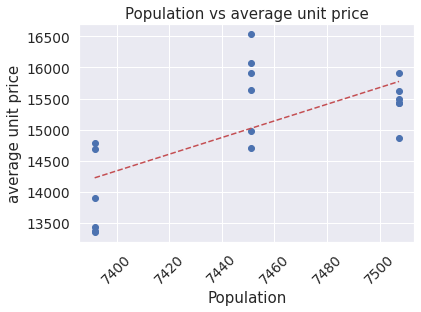

In [242]:
drawGraphs("Population")

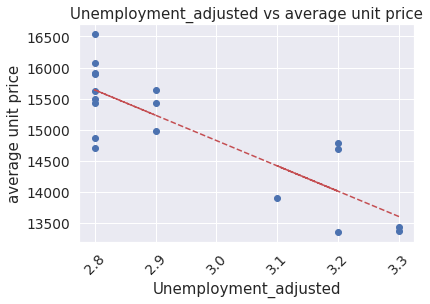

In [243]:
drawGraphs("Unemployment_adjusted")

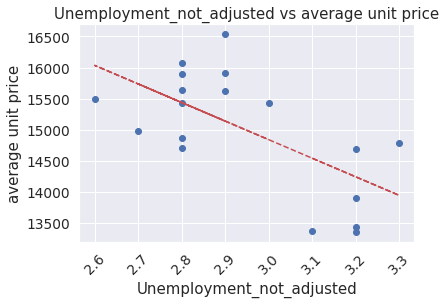

In [244]:
drawGraphs("Unemployment_not_adjusted")

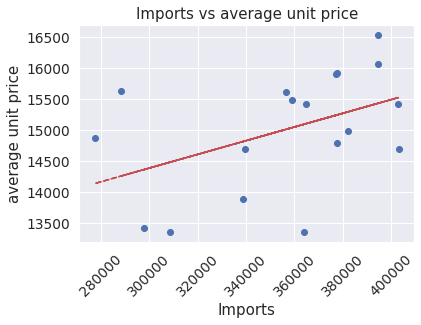

In [245]:
drawGraphs("Imports")

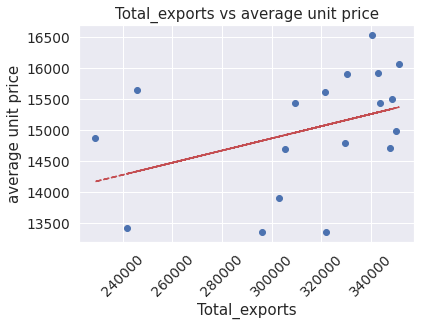

In [246]:
drawGraphs("Total_exports")

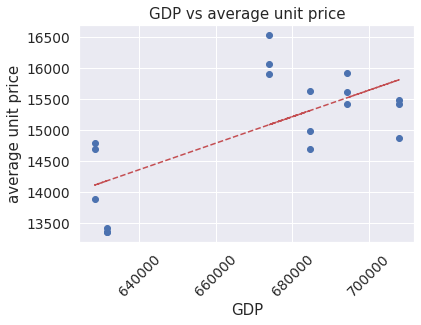

In [247]:
drawGraphs("GDP")

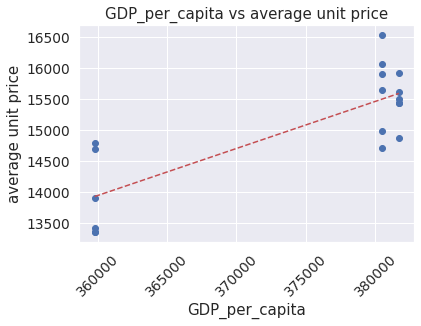

In [248]:
drawGraphs("GDP_per_capita")

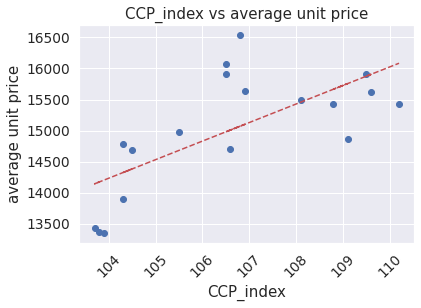

In [249]:
drawGraphs("CCP_index")

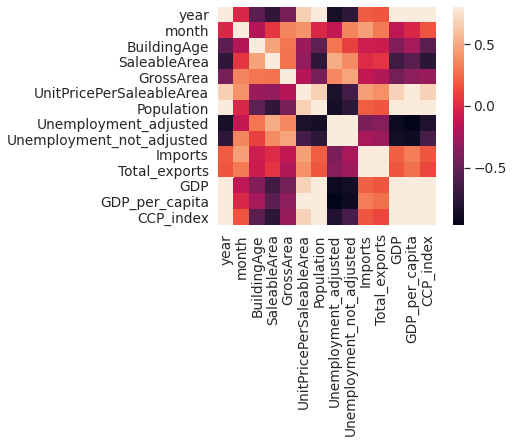

In [ ]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

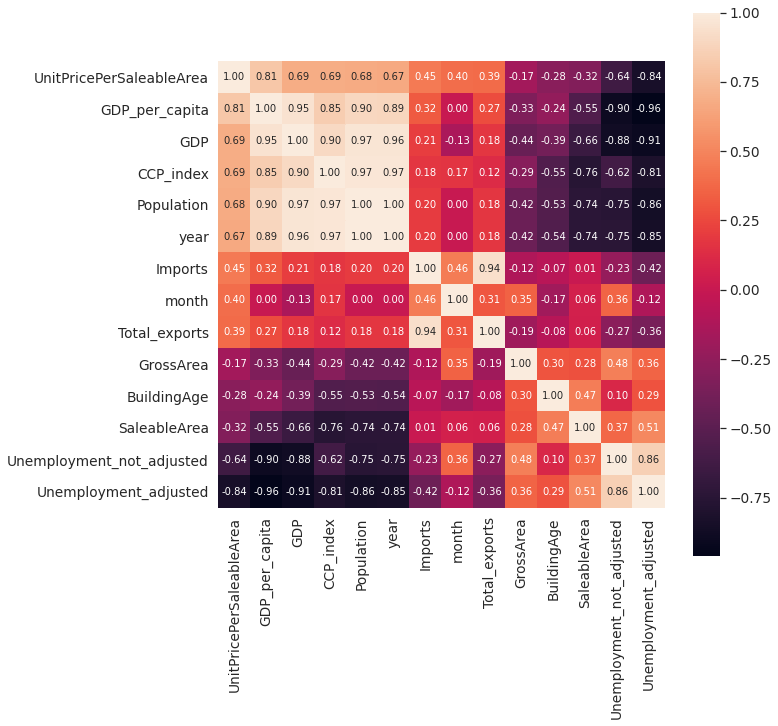

In [ ]:
# Price correlation matrix
k = 14
fig, ax = plt.subplots(figsize=(10,10)) 
cols = corrmat.nlargest(k, 'UnitPricePerSaleableArea')['UnitPricePerSaleableArea'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

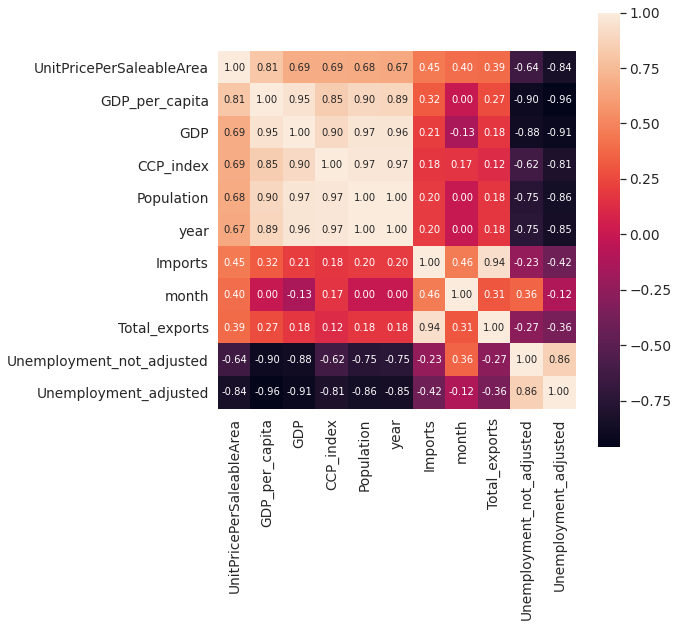

In [ ]:
result = df.copy()

result = result.drop(['BuildingAge', 'SaleableArea', 'GrossArea'], axis=1) 

corrmat = result.corr()
#sns.heatmap(corrmat, vmax=.8, square=True);

k = 12
fig, ax = plt.subplots(figsize=(8,8)) 
cols = corrmat.nlargest(k, 'UnitPricePerSaleableArea')['UnitPricePerSaleableArea'].index
cm = np.corrcoef(result[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()